### Import Required Models and Helper Classes

In [7]:
# from IPython.core.display import HTML
# HTML("<script>Jupyter.notebook.kernel.restart()</script>")
%reload_ext autoreload
%autoreload 2
PROJECT_DIR = "/Users/raghav/envPython3/experiments/one_class_neural_networks/"
import sys,os
import numpy as np
sys.path.append(PROJECT_DIR)
from src.data.make_dataset import CreateDataSet
from src.models.fakeNoiseNN import SupervisedFakeNoiseNN
from src.models.SupervisedNN import SupervisedNN
## Create data for training and testing
createData = CreateDataSet()

## Signatures of the methods


### ===============================================================
get_USPS_TestingData: 
        returns-> 220 : 1s and 11: 7s
 
get_LHC_TestingData: 
        returns-> User can define Number of random Background(Normal) and Signal( Noise) images 
        
 get_USPS_TrainingData: 
        returns-> 220 : 1s

get_LHC_TrainingData: 
        returns-> User Defined: Number of  : Background Images
### ===============================================================

get_LHC_TestingData_With_Random_UniformNoise: 
        returns->  User can define number of random Background(Normal) , Signal( Noise) images  and URN uniform random noise samples to be returned

get_USPS_TestingData_With_Random_UniformNoise: 
        returns-> 220 : 1s and 220: URN( Uniform Random Noise)

get_FAKE_Noise_TrainingData
        returns-> 220 : URN

### ===============================================================


#### ===============================================================
### Experiment Setup


- for all methods, the test set is exactly the same (i.e., ones and sevens)

- for OCNN_FakeNoise, the training set does include uniform noise; what we do is treat these as negatives, and add a new term to the objective, which measures the hinge loss when making predictions for these fake points. This is almost exactly the same as the Keras FakeNN method, but instead of using cross-entropy loss, we use hinge-loss; and we additionally learn a parameter r, which controls the fraction of points predicted to be anomalous



In [8]:
## Obtaining the training and testing data
X_Pos,X_PosLabel = createData.get_USPS_TrainingData()
[Xtest_Pos,label_ones,Xtest_Neg,label_sevens]= createData.get_USPS_TestingData()

StandardScaler(copy=True, with_mean=True, with_std=True)


## Supervised NN Get Best Performing Model and later on load the saved model

In [13]:
NUM_EPOCHS = 10
%reload_ext autoreload
%autoreload 2
 
# iterations = 100
# for i in range(0,100):
#         ## Create an Binary supervised classifier instance for training
#         clf_SupervisedNN =  SupervisedNN()
#         clf_SupervisedNN.fit(X_Pos,X_PosLabel,NUM_EPOCHS)  ## fit takes Normal and FakeNoise concatenates before training
#         ## Load the best performing model once trained
#         clf_SupervisedNN =  SupervisedNN()
#         res = clf_SupervisedNN.predict(Xtest_Pos,Xtest_Neg)
#         if(res >=0.99):
#             auc_Supervised_NN = res
#             print("="*35)
#             print("AUC:",res)
#             print("="*35)
#             break
## Load the best performing model once trained
clf_SupervisedNN =  SupervisedNN()
res = clf_SupervisedNN.predict(Xtest_Pos,Xtest_Neg)
auc_Supervised_NN = res
print("="*35)
print("AUC:",res)
print("="*35)

AUC: 0.9950413223140496


/Users/raghav/envPython3/lib/python3.6/site-packages/keras/engine/sequential.py:252: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


## FAKE_NOISE_KerasBinaryClassifier

In [20]:
## Fake Noise data to be generated which will be added to the training set before training
%reload_ext autoreload
%autoreload 2

X_Neg,X_NegLabel = createData.get_FAKE_Noise_TrainingData(X_Pos)

data_train = np.concatenate((X_Pos,X_Neg),axis=0)
labels_train = np.concatenate((X_PosLabel,X_NegLabel),axis=0)

# NUM_EPOCHS = 10
# ## Create an Binary supervised classifier instance
# clf_FakeNoiseNN =  SupervisedFakeNoiseNN()
# iterations = 100
# print("="*35)
# print("AUC per Iteration: ")
# print("="*35)
# for i in range(0,100):
#     print("Iteration:",i)
#     clf_FakeNoiseNN.fit(data_train,labels_train,NUM_EPOCHS)  ## fit takes Normal and FakeNoise concatenates before training
#     res = clf_FakeNoiseNN.predict(Xtest_Pos,Xtest_Neg)
#     auc_FN_Supervised = res
#     print("_"*15)
#     if(res >=0.70):
#         auc_FN_Supervised = res
#         print("="*35)
#         print("AUC:",res)
#         print("="*35)
#         break

clf_FakeNoiseNN =  SupervisedFakeNoiseNN()
res = clf_FakeNoiseNN.predict(Xtest_Pos,Xtest_Neg)
auc_FakeNoiseNN = res
print("="*35)
print("AUC:",res)
print("="*35)

AUC: 0.7231404958677686
AUC: 0.7231404958677686


## SKLEARN OCSVM

Training the OCSVM classifier.....
AUC: 1.0


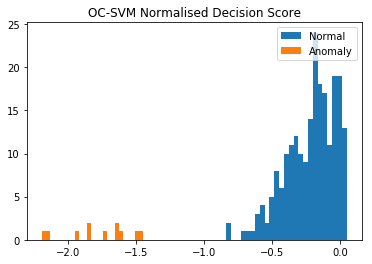

In [21]:
##create the classifier
from src.models.ocsvmSklearn import OCSVM
ocsvm = OCSVM()
nu= 0.04
kernel = 'rbf'
clf = ocsvm.fit(X_Pos,nu,kernel)
res = ocsvm.score(clf,Xtest_Pos,Xtest_Neg)
auc_OCSVM = res
print("="*35)
print("AUC:",res)
print("="*35)

### OC-NN


Training the OCNN classifier.....
Training OC-NN started for epochs:  100
Epoch = 1, r = -566.405496, Cost = 18809752.000000
Epoch = 2, r = -565.850132, Cost = 18769572.000000
Epoch = 3, r = -565.294673, Cost = 18729436.000000
Epoch = 4, r = -564.739231, Cost = 18689348.000000
Epoch = 5, r = -564.183911, Cost = 18649310.000000
Epoch = 6, r = -563.628699, Cost = 18609318.000000
Epoch = 7, r = -563.073423, Cost = 18569374.000000
Epoch = 8, r = -562.518223, Cost = 18529482.000000
Epoch = 9, r = -561.963223, Cost = 18489644.000000
Epoch = 10, r = -561.422817, Cost = 18449850.000000
Epoch = 11, r = -560.890002, Cost = 18410110.000000
Epoch = 12, r = -560.357217, Cost = 18370422.000000
Epoch = 13, r = -559.824661, Cost = 18330788.000000
Epoch = 14, r = -559.292102, Cost = 18291210.000000
Epoch = 15, r = -558.759758, Cost = 18251682.000000
Epoch = 16, r = -558.227505, Cost = 18212212.000000
Epoch = 17, r = -557.695342, Cost = 18172798.000000
Epoch = 18, r = -557.163330, Cost = 18133436.000000

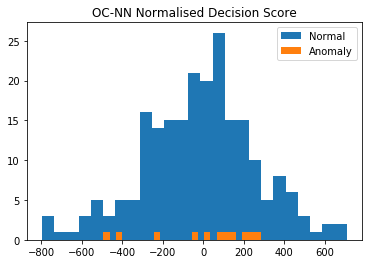

In [22]:
##create the classifier
## Instantiate the object and call the function
from src.models.ocnn import OCNN
ocnn = OCNN()

nu= 0.04
activation = 'sigmoid'
epochs = 100
ocnn.fit(X_Pos,nu,activation,epochs)
res = ocnn.score(Xtest_Pos,Xtest_Neg) 
auc_OCNN = res
print("="*35)
print("AUC:",res)
print("="*35)






### OC-NN WITH FAKENOISE

Training the OCNN classifier.....
X_trainNeg: (220, 256)
Training OC-NN started for epochs:  100
Epoch = 1, r = -501.361133, Cost = 18837766.000000
Epoch = 2, r = -500.858322, Cost = 18797554.000000
Epoch = 3, r = -500.355557, Cost = 18757388.000000
Epoch = 4, r = -499.852760, Cost = 18717272.000000
Epoch = 5, r = -499.350117, Cost = 18677202.000000
Epoch = 6, r = -498.847373, Cost = 18637180.000000
Epoch = 7, r = -498.344836, Cost = 18597208.000000
Epoch = 8, r = -497.842358, Cost = 18557284.000000
Epoch = 9, r = -497.339858, Cost = 18517418.000000
Epoch = 10, r = -496.837417, Cost = 18477596.000000
Epoch = 11, r = -496.335190, Cost = 18437824.000000
Epoch = 12, r = -495.832985, Cost = 18398108.000000
Epoch = 13, r = -495.330970, Cost = 18358442.000000
Epoch = 14, r = -494.828945, Cost = 18318834.000000
Epoch = 15, r = -494.327189, Cost = 18279278.000000
Epoch = 16, r = -493.825460, Cost = 18239776.000000
Epoch = 17, r = -493.323929, Cost = 18200332.000000
Epoch = 18, r = -492.822489,

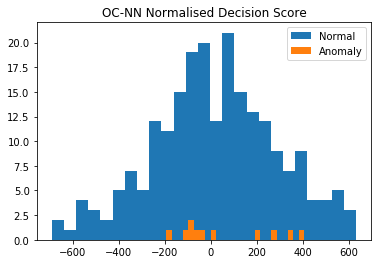

In [4]:
## Fake Noise data to be generated which will be added to the training set before training
X_Neg,X_NegLabel = createData.get_FAKE_Noise_TrainingData(X_Pos)

##create the classifier
## Instantiate the object and call the function
from src.models.ocnnFakeNoise import OCNNFakeNoiseNN
ocnn = OCNNFakeNoiseNN()

nu= 0.04
activation = 'sigmoid'
epochs = 100
ocnn.fit(X_Pos,X_Neg,nu,activation,epochs)
print(X_Neg.shape)
## Testing the OC-NN with Fake Noise
res = ocnn.score(Xtest_Pos,Xtest_Neg)
print("="*35)
print("AUC:",res)
print("="*35)



### Experiments by changing the loss functions

## Experiment-1 with (1/nu) term
term5 = 1/nu * tf.reduce_sum( tf.maximum(0.0, 1.0 + nnScore(Xneg, w, V, g,bias1,bias2)))


## Experiment-2 with (1/nu) and plus r term
term5 = 1/nu * tf.reduce_sum( tf.maximum(0.0, r + nnScore(Xneg, w, V, g,bias1,bias2)))

## Experiment 1

Training the OCNN classifier.....
X_trainNeg: (220, 256)
Training OC-NN started for epochs:  100
Epoch = 1, r = -501.361133, Cost = 19557384.000000
Epoch = 2, r = -500.858322, Cost = 19516398.000000
Epoch = 3, r = -500.355542, Cost = 19475458.000000
Epoch = 4, r = -499.852760, Cost = 19434566.000000
Epoch = 5, r = -499.350078, Cost = 19393722.000000
Epoch = 6, r = -498.847373, Cost = 19352926.000000
Epoch = 7, r = -498.344783, Cost = 19312180.000000
Epoch = 8, r = -497.842268, Cost = 19271482.000000
Epoch = 9, r = -497.339766, Cost = 19230836.000000
Epoch = 10, r = -496.837380, Cost = 19190242.000000
Epoch = 11, r = -496.335144, Cost = 19149698.000000
Epoch = 12, r = -495.833138, Cost = 19109210.000000
Epoch = 13, r = -495.331145, Cost = 19068772.000000
Epoch = 14, r = -494.829434, Cost = 19028390.000000
Epoch = 15, r = -494.327783, Cost = 18988062.000000
Epoch = 16, r = -493.826267, Cost = 18947788.000000
Epoch = 17, r = -493.324904, Cost = 18907570.000000
Epoch = 18, r = -492.823752,

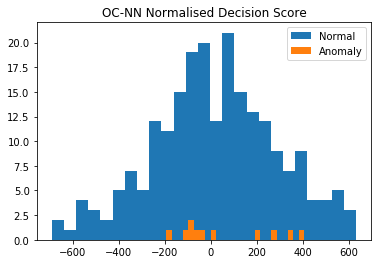

In [3]:
## Fake Noise data to be generated which will be added to the training set before training
X_Neg,X_NegLabel = createData.get_FAKE_Noise_TrainingData(X_Pos)


##create the classifier
## Instantiate the object and call the function
from src.models.ocnnFakeNoise import OCNNFakeNoiseNN
ocnn = OCNNFakeNoiseNN()

nu= 0.04
activation = 'sigmoid'
epochs = 100
ocnn.fit(X_Pos,X_Neg,nu,activation,epochs)
print(X_Neg.shape)
## Testing the OC-NN with Fake Noise
res = ocnn.score(Xtest_Pos,Xtest_Neg)
print("="*35)
print("AUC:",res)
print("="*35)


 ## With r = 1

Training the OCNN classifier.....
Training OC-NN started for epochs:  100
Epoch = 1, Cost = 18809400.000000
Epoch = 2, Cost = 18769220.000000
Epoch = 3, Cost = 18729084.000000
Epoch = 4, Cost = 18688998.000000
Epoch = 5, Cost = 18648960.000000
Epoch = 6, Cost = 18608968.000000
Epoch = 7, Cost = 18569026.000000
Epoch = 8, Cost = 18529134.000000
Epoch = 9, Cost = 18489296.000000
Epoch = 10, Cost = 18449504.000000
Epoch = 11, Cost = 18409762.000000
Epoch = 12, Cost = 18370074.000000
Epoch = 13, Cost = 18330440.000000
Epoch = 14, Cost = 18290862.000000
Epoch = 15, Cost = 18251336.000000
Epoch = 16, Cost = 18211868.000000
Epoch = 17, Cost = 18172452.000000
Epoch = 18, Cost = 18133092.000000
Epoch = 19, Cost = 18093792.000000
Epoch = 20, Cost = 18054546.000000
Epoch = 21, Cost = 18015360.000000
Epoch = 22, Cost = 17976228.000000
Epoch = 23, Cost = 17937156.000000
Epoch = 24, Cost = 17898144.000000
Epoch = 25, Cost = 17859192.000000
Epoch = 26, Cost = 17820296.000000
Epoch = 27, Cost = 177814

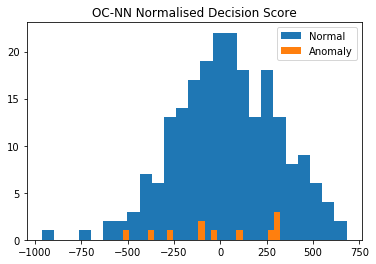

In [23]:
#### Fake Noise data to be generated which will be added to the training set before training
X_Neg,X_NegLabel = createData.get_FAKE_Noise_TrainingData(X_Pos)


##create the classifier
## Instantiate the object and call the function
from src.models.ocnnFakeNoise import OCNNFakeNoiseNN
ocnn = OCNNFakeNoiseNN()

nu= 0.04
activation = 'sigmoid'
epochs = 100
ocnn.fit(X_Pos,X_Neg,nu,activation,epochs)
print(X_Neg.shape)
## Testing the OC-NN with Fake Noise
res = ocnn.score(Xtest_Pos,Xtest_Neg)
auc_FN_OCNN_R_1 = res
print("="*35)
print("AUC:",res)
print("="*35)

Text(0.5,1,'AUC Comparision for USPS Dataset ')

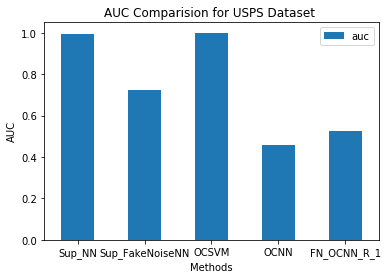

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

auc = np.zeros((1,5))
auc[0][0] = auc_FN_Supervised
auc[0][1] = auc_OCSVM
auc[0][2] = auc_OCNN
auc[0][3] = auc_FN_OCNN_R_1
auc[0][4] = auc_Supervised_NN


aucList = [auc_Supervised_NN,auc_FN_Supervised, auc_OCSVM, auc_OCNN, auc_FN_OCNN_R_1]

index = ['Sup_NN', 'Sup_FakeNoiseNN', 'OCSVM',
      'OCNN', 'FN_OCNN_R_1']
df = pd.DataFrame({'auc': aucList}, index=index)
ax = df.plot.bar(rot=0)


# df = pd.DataFrame(auc,columns=['Sup_NN','Sup_FakeNoiseNN','OCSVM','OCNN','FN_OCNN_R_1'])
# boxplot = df.boxplot(column=['Sup_NN', 'Sup_FakeNoiseNN','OCSVM', 'OCNN','FN_OCNN_R_1'],grid=False)
plt.ylabel('AUC')
plt.xlabel('Methods')
plt.title('AUC Comparision for USPS Dataset ')